In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [3]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 63
1 63
2 63
3 63
4 63
5 63
6 63
7 63
8 63
9 63
10 63
11 63
12 63
13 63
14 63
15 63
16 63
17 63
18 63
19 63
20 63
21 63
22 63
23 63
24 63
25 63
26 63
27 63
28 63
29 63
30 63
31 63
32 63
33 63
34 63
35 63
36 63
37 63
38 63
39 63
40 63
41 63
42 63
43 63
44 63
45 63
46 63
47 63
48 63
49 63
50 63
51 63
52 63
53 63
54 63
55 63
56 63
57 63
58 63
59 63
60 63
61 63
62 63
Fetched data for 63 days.


In [4]:
df = pd.concat(frames)

In [5]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [6]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
18878,2020-07-20 22:59:00+00:00,binderhub.jupyter.org/launch,4,GitHub,mpbeu/Intro/master,e99c52245bc7c0df63e08cdd6650a83d302ba6f6,success,gke.mybinder.org,mpbeu/Intro,mpbeu
3038,2020-07-30 04:55:00+00:00,binderhub.jupyter.org/launch,4,GitHub,explosion/spacy-io-binder/live,46f7d6ffd6ec206023fbbc23b7a879fde19b3498,success,ovh.mybinder.org,explosion/spacy-io-binder,explosion
13442,2020-08-26 14:29:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
4503,2020-07-27 07:12:00+00:00,binderhub.jupyter.org/launch,4,GitHub,bokeh/bokeh-notebooks/master,7b6da26945e284b19df07daecc6beabdb7adbe81,success,gke.mybinder.org,bokeh/bokeh-notebooks,bokeh
12173,2020-08-08 22:04:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
3475,2020-08-05 05:39:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
7654,2020-08-27 08:46:00+00:00,binderhub.jupyter.org/launch,4,GitHub,allenai/allennlp-guide-examples/master,53c4c8e9f2da1fc995664f18baeb90b546b0fbf1,success,gke.mybinder.org,allenai/allennlp-guide-examples,allenai
1098,2020-07-18 02:33:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
5607,2020-08-16 09:27:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
1159,2020-07-28 02:14:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab


In [7]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [8]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
12724,2020-07-31 16:03:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
13258,2020-07-04 23:02:00+00:00,GitHub,success,turing.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
8427,2020-07-05 15:14:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
4969,2020-07-11 10:36:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
12203,2020-07-12 21:08:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
9799,2020-07-05 17:12:00+00:00,GitHub,success,gesis.mybinder.org,rlabbe/Kalman-and-Bayesian-Filters-in-Python,rlabbe
12240,2020-07-09 14:24:00+00:00,GitHub,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
17288,2020-07-16 20:09:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
3787,2020-08-16 07:04:00+00:00,GitHub,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
12267,2020-08-20 14:09:00+00:00,GitHub,success,gke.mybinder.org,ipython/ipython-in-depth,ipython


In [9]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [10]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [11]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
20645,2020-09-02 19:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-02 19:03:00+00:00
21441,2020-09-02 19:55:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-02 19:55:00+00:00
22541,2020-09-02 21:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-02 21:12:00+00:00
23183,2020-09-02 22:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-09-02 22:03:00+00:00


In [14]:
daily = ds.set_index("timestamp").resample('D').count()

In [15]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


In [18]:
daily.tail()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-08-29 00:00:00+00:00,0,0,0,0,0,0
2020-08-30 00:00:00+00:00,4,4,4,4,4,4
2020-08-31 00:00:00+00:00,1,1,1,1,1,1
2020-09-01 00:00:00+00:00,2,2,2,2,2,2
2020-09-02 00:00:00+00:00,7,7,7,7,7,7


Text(0.5, 0, '')

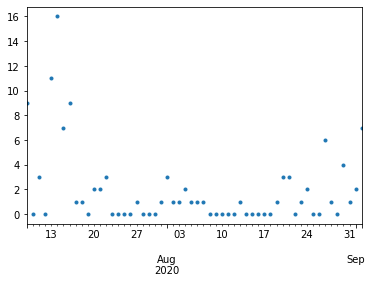

In [16]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')

In [17]:
np.sum(daily['repo'])

108